# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [278]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [279]:
# Add any additional import statements you need here
from nltk.tokenize import WordPunctTokenizer
import string
import unicodedata
import matplotlib.pyplot as plt

In [26]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/lamnguyen/Dropbox/Uyen bom/USD/ADS-509/mod1/ads509_mode1_api_scrape/"
# data folder
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [161]:
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, calculate and print the number of tokens, number of unique tokens,
    number of characters, lexical diversity, and the most common tokens. Return a list with
    the calculated statistics.
    """
    
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens
    
    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        
        # Print the 5 most common tokens
        common_tokens = Counter(tokens).most_common(num_tokens)
        print("The most common tokens are:")
        for token, count in common_tokens[:5]: #print out 5 most common token
            print(f"{token}: {count}")
    
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [162]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The most common tokens are:
text: 3
here: 2
example: 2
is: 1
some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: The assertion statements are used to raise errors if the conditions are not met. In this case, it will raise error if the discriptive_stat claculation came out different than the expected values.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [256]:
# Read in the lyrics data
#Create list lyric data list
lyrics_data = []

# Set path to the artist folders
for artist_folder in os.listdir(data_location + lyrics_folder):
    artist_path = os.path.join(data_location + lyrics_folder, artist_folder)
    
    # set path to the lyric file
    for lyric_file in os.listdir(artist_path):
        lyric_path = os.path.join(artist_path, lyric_file)
            
        # Read the lyrics from the lyric files
        with open(lyric_path, 'r', encoding='utf8') as infile:
            lyrics = infile.read()

        # Extract the title from the lyrics
        title = lyrics.split("\n", 1)[0].strip()

        # Remove the title from the lyrics
        lyrics = lyrics.replace(title, "").strip()

        # Append the artist, title, and lyrics to the data list
        lyrics_data.append([artist_folder, title, lyrics])

# Create a DataFrame from the lyrics data
lyric_df = pd.DataFrame(lyrics_data, columns=['artist', 'title', 'lyrics'])

In [257]:
lyric_df.head()

,artist,title,lyrics
0,robyn,"""Include Me Out""","It is really very simple\nJust a single pulse,..."
1,robyn,"""Electric""",Electric...\n\nIt's electric\nIt's a natural h...
2,robyn,"""Beach 2K20""",(So you wanna go out?\nHow you gonna get there...
3,robyn,"""Love Kills""",If you're looking for love\nGet a heart made o...
4,robyn,"""Time Machine""","Hey, what did I do?\nCan't believe the fit I j..."


In [258]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(list)
for f in desc_files :
    artist = f.split("_")[0]
        
    with open(data_location + twitter_folder + f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            line = line.strip().split("\t")
            if len(line) == 7 :
                twitter_data[artist].append(line[6])

# Convert the dictionary to a DataFrame
twit_df = pd.DataFrame.from_dict(twitter_data, orient='index')
# Transpose the DataFrame to have artists as columns
twit_df = twit_df.transpose()

In [104]:
twit_df.head()

,cher,robynkonichiwa
0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"""I love chill"" •Facebook / Instagram / SoundCl..."
1,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"books, movies, music, nature & TV shows. OG Sw..."
2,csu,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
3,Writer @Washinformer @SpelmanCollege alumna #D...,This Twitter profile is full of sarcasm and ra...
4,I’m unemployed and live with my parents. MOOPS!,Flora Youssef - Blogger & Founder Posting revi...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [259]:
punctuation = set(punctuation) # speeds up comparison

# Tokenizer
tokenizer = WordPunctTokenizer()

# Function to clean and tokenize the lyrics
def clean_tokenize(text):
    if text is None:
        return []
    # Remove punctuation
    text = ''.join([c for c in text if c not in punctuation])
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens


In [169]:
# create your clean twitter data here
# Apply the cleaning and tokenization function to the twitter columns
twit_df['cleaned_cher'] = twit_df['cher'].apply(clean_tokenize)
twit_df['cleaned_robynkonichiwa'] = twit_df['robynkonichiwa'].apply(clean_tokenize)
twit_df.head()

,cher,robynkonichiwa,cleaned_cher,cleaned_robynkonichiwa
0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"""I love chill"" •Facebook / Instagram / SoundCl...","[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]","[love, chill, •, facebook, instagram, soundclo..."
1,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"books, movies, music, nature & TV shows. OG Sw...","[163, ㎝／, 愛かっぷ, 💜, 26歳, 🍒, 工〇好きな女の子, 💓, フォローして...","[books, movies, music, nature, tv, shows, og, ..."
2,csu,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...,[csu],"[amauteur, en, herbe, 🌱, juriste, en, paille, ..."
3,Writer @Washinformer @SpelmanCollege alumna #D...,This Twitter profile is full of sarcasm and ra...,"[writer, washinformer, spelmancollege, alumna,...","[twitter, profile, full, sarcasm, rants, occas..."
4,I’m unemployed and live with my parents. MOOPS!,Flora Youssef - Blogger & Founder Posting revi...,"[’, unemployed, live, parents, moops]","[flora, youssef, blogger, founder, posting, re..."


In [261]:
# create your clean lyrics data here
# Apply the cleaning and tokenization function to the lyrics column
lyric_df['cleaned_lyrics'] = lyric_df['lyrics'].apply(clean_tokenize)
lyric_df.head()

,artist,title,lyrics,cleaned_lyrics
0,robyn,"""Include Me Out""","It is really very simple\nJust a single pulse,...","[really, simple, single, pulse, repeated, regu..."
1,robyn,"""Electric""",Electric...\n\nIt's electric\nIt's a natural h...,"[electric, electric, natural, high, electric, ..."
2,robyn,"""Beach 2K20""",(So you wanna go out?\nHow you gonna get there...,"[wanna, go, gonna, get, ok, call, someone, alr..."
3,robyn,"""Love Kills""",If you're looking for love\nGet a heart made o...,"[youre, looking, love, get, heart, made, steel..."
4,robyn,"""Time Machine""","Hey, what did I do?\nCan't believe the fit I j...","[hey, cant, believe, fit, threw, stupid, wante..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [ ]:
# calls to descriptive_stats here

In [163]:
# calls descriptive_stats here for Robyn's lyric data
descriptive_stats(lyric_df.loc[lyric_df['artist'] == 'robyn', 'cleaned_lyrics'].explode().tolist())

There are 15170 tokens in the data.
There are 2157 unique tokens in the data.
There are 72795 characters in the data.
The lexical diversity is 0.142 in the data.
The most common tokens are:
know: 305
im: 299
dont: 297
love: 269
got: 250


[15170, 2157, 0.14218852999340803, 72795]

In [164]:
# calls descriptive_stats here for Cher's lyric data 
descriptive_stats(lyric_df.loc[lyric_df['artist'] == 'cher', 'cleaned_lyrics'].explode().tolist())

There are 35266 tokens in the data.
There are 3690 unique tokens in the data.
There are 169232 characters in the data.
The lexical diversity is 0.105 in the data.
The most common tokens are:
love: 966
im: 511
know: 480
dont: 430
youre: 332


[35266, 3690, 0.10463335790846708, 169232]

In [175]:
#calls descriptive_stats here for Robyn's twitter data 
#Robyn's data seemed to have float typed token causing trouble in descriptive_stat calculation
tokens = twit_df['cleaned_robynkonichiwa'].explode().tolist()

#filter out float typed token and convert the remain to string to avoid error
tokens = [str(token) for token in tokens if not isinstance(token, float)]
descriptive_stats(tokens)

There are 1528078 tokens in the data.
There are 241824 unique tokens in the data.
There are 9108181 characters in the data.
The lexical diversity is 0.158 in the data.
The most common tokens are:
music: 15362
love: 11828
im: 9098
och: 7924
life: 7558


[1528078, 241824, 0.15825370170894418, 9108181]

In [177]:
#calls descriptive_stats here for Cher's twitter data 
#Cher's data seemed to have float typed token causing trouble in descriptive_stat calculation
tokens = twit_df['cleaned_cher'].explode().tolist()

#filter out float typed token and convert the remain to string to avoid error
tokens = [str(token) for token in tokens if not isinstance(token, float)]
descriptive_stats(tokens)

There are 16190060 tokens in the data.
There are 1336852 unique tokens in the data.
There are 92628042 characters in the data.
The lexical diversity is 0.083 in the data.
The most common tokens are:
love: 217711
im: 139895
life: 126473
music: 90160
’: 85846


[16190060, 1336852, 0.0825723931844601, 92628042]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Stopwords are words that are very common and would have high frequncy in the data. Therefore, if stopwords were left in the data, they would dominate the list of most common words. The result of top 5  mostcommon words might have been stopwords instead of other useful words.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior beliefs about the lexical diversity of lyrics between the artists was that there could be differences attributed to their distinct musical styles and the trending eras in which they were popular. Along with that, I also believed that the twitter lexical diversity might be influenced by the musical preferences, life perspectives, and writing styles of their respective fan bases, thereby leading to variations. The result showing differences in lexical diversity between the artists conformed these beliefs.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [217]:
#verify the is_emoji() function correctly identifies emojis.
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [280]:
# #Shorter approach:
# emojis = defaultdict(list)
# for artist in twitter_data:
#     for desc in twitter_data[artist]:
#         emojis[artist].extend([c for c in desc if emoji.is_emoji(c)])
        
# for artist in emojis:
#     print(artist)
#     print(Counter(emojis[artist]).most_common(10))

In [297]:
def get_common_emojis(df, artist_column):
    emojis_count = Counter()
    for description in df[artist_column]:
        if description is not None:
            emojis = [c for c in description if is_emoji(c)]
            emojis_count.update(emojis)

    most_common_emojis = emojis_count.most_common(10)
    return most_common_emojis

#print out 10 most common emojis from Robyn's followers
most_common_emojis = get_common_emojis(twit_df, 'robynkonichiwa')
print("Top 10 common emojis by Robyn:")
for emoji, count in most_common_emojis:
    print(emoji, count)

#print out 10 most common emojis from Cher's followers
most_common_emojis = get_common_emojis(twit_df, 'cher')
print("Cher's top 10 emojis:")
for emoji, count in most_common_emojis:
    print(emoji, count)

Top 10 common emojis by Robyn:
❤ 4783
🌈 4685
🏳 3528
♥ 3103
✨ 2223
🇺 1343
🇪 1264
🇸 1214
✌ 1189
♡ 1123
Cher's top 10 emojis:
❤ 79223
🌈 47549
♥ 33978
🏳 33412
✨ 29468
🇺 25793
💙 21379
🌊 20223
♡ 19432
🇸 18309


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [254]:
#Create function to get common hashtags
def get_common_hashtags(df, artist_column):
    hashtags_count = Counter() #create list of hashtags and their counts
    for descriptions in df[artist_column]:
        if isinstance(descriptions, str):  # Check if description is a string
            hashtags = re.findall(r'#(\w+)', descriptions, flags=re.IGNORECASE)  # Extract hashtags using regex
            hashtags_count.update(hashtags)

    most_common_hashtags = hashtags_count.most_common(10)
    return most_common_hashtags

#Top 10 most hashtags from Robyn's followers
most_common_hashtags_robyn = get_common_hashtags(twit_df, 'robynkonichiwa')
print("Robyn's top 10 hashtags:")
for hashtag, count in most_common_hashtags_robyn:
    print(hashtag, count)

print('----------------------------')
    
#Top 10 most hashtags from Cher's followers
most_common_hashtags_cher = get_common_hashtags(twit_df, 'cher')
print("Cher's top 10 hashtags:")
for hashtag, count in most_common_hashtags_cher:
    print(hashtag, count)


Robyn's top 10 hashtags:
BlackLivesMatter 337
BLM 306
blacklivesmatter 208
1 199
music 174
Music 113
EDM 86
LGBTQ 75
TeamFollowBack 59
blm 56
----------------------------
Cher's top 10 hashtags:
BLM 9535
Resist 6036
BlackLivesMatter 4681
resist 3797
FBR 3239
TheResistance 2995
blacklivesmatter 2645
1 2627
Resistance 1919
RESIST 1823


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


#### --> it might be more informative to observe most common words with stopwords removed

In [264]:
#Apply the cleaning and tokenization function to the lyrics title
lyric_df['cleaned_title'] = lyric_df['title'].apply(clean_tokenize)
lyric_df.head(2)

,artist,title,lyrics,cleaned_lyrics,cleaned_title
0,robyn,"""Include Me Out""","It is really very simple\nJust a single pulse,...","[really, simple, single, pulse, repeated, regu...",[include]
1,robyn,"""Electric""",Electric...\n\nIt's electric\nIt's a natural h...,"[electric, electric, natural, high, electric, ...",[electric]


In [268]:
#Create function to get most common words in song titles 
def get_common_words(df, artist_name, title_column):
    words_count = Counter()
    artist_df = df[df['artist'] == artist_name]
    for words in artist_df[title_column]:
        for word in words:
            words_count[word] += 1

    most_common_words = words_count.most_common(5)
    return most_common_words

#Top 5 most common words in song titles by Robyn
most_common_words = get_common_words(lyric_df, 'robyn', 'cleaned_title')
print("Robyn's top 5 most common words in song titles:")
for word, count in most_common_words:
    print(word, count)

print('----------------------------') 
    
#Top 5 most common words in song titles by Cher
most_common_words = get_common_words(lyric_df, 'cher', 'cleaned_title')
print("Cher's top 5 most common words in song titles:")
for word, count in most_common_words:
    print(word, count)

Robyn's top 5 most common words in song titles:
love 6
dont 4
u 4
hang 3
tell 3
----------------------------
Cher's top 5 most common words in song titles:
love 38
man 12
song 11
dont 10
come 7


#### Observe most common words including stopwords

In [263]:
def get_common_words(df, artist_name, title_column):
    words_count = Counter()
    artist_df = df[df['artist'] == artist_name]
    for title in artist_df[title_column]:
        words = title.lower().split()
        words_count.update(words)

    most_common_words = words_count.most_common(5)
    return most_common_words

#Top 5 most common words in song titles by Robyn
most_common_words = get_common_words(lyric_df, 'robyn', 'title')
print("Robyn's top 5 most common words in song titles:")
for word, count in most_common_words:
    print(word, count)

print('----------------------------') 
    
#Top 5 most common words in song titles by Cher
most_common_words = get_common_words(lyric_df, 'cher', 'title')
print("Cher's top 5 most common words in song titles:")
for word, count in most_common_words:
    print(word, count)

Robyn's top 5 most common words in song titles:
me 7
you 7
the 7
my 6
to 6
----------------------------
Cher's top 5 most common words in song titles:
the 29
to 28
"the 24
of 21
"i 21


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

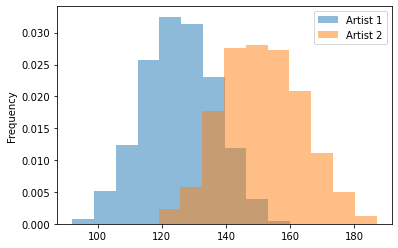

In [273]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches one or more consecutive whitespace characters.


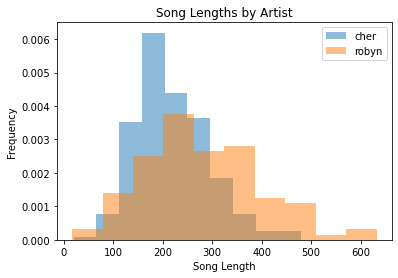

In [275]:

collapse_whitespace = re.compile(r'\s+')

# Create function to tokenize lyrics
def tokenize_lyrics(lyric):
    """Strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric)]

# Tokenize lyrics and count number of tokens
lyric_df['tokenized_lyrics'] = lyric_df['lyrics'].apply(tokenize_lyrics)
lyric_df['song_length'] = lyric_df['tokenized_lyrics'].apply(len)

# Create histogram for each artist
fig, ax = plt.subplots()
lyric_df.groupby('artist')['song_length'].plot(kind='hist', density=True, alpha=0.5, legend=True, ax=ax)

# Set plot labels and title
ax.set_xlabel('Song Length')
ax.set_ylabel('Frequency')
ax.set_title('Song Lengths by Artist')

# Show the plot
plt.show()
